<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 27: Sample Means

Associated Textbook Sections: [14.5](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-27:-Sample-Means" data-toc-modified-id="Lecture-27:-Sample-Means-1">Lecture 27: Sample Means</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#Central-Limit-Theorem" data-toc-modified-id="Central-Limit-Theorem-1.3">Central Limit Theorem</a></span><ul class="toc-item"><li><span><a href="#Sample-Averages" data-toc-modified-id="Sample-Averages-1.3.1">Sample Averages</a></span></li><li><span><a href="#Central-Limit-Theorem" data-toc-modified-id="Central-Limit-Theorem-1.3.2">Central Limit Theorem</a></span></li><li><span><a href="#Demo:-Central-Limit-Theorem" data-toc-modified-id="Demo:-Central-Limit-Theorem-1.3.3">Demo: Central Limit Theorem</a></span></li></ul></li><li><span><a href="#Distribution-of-the-Sample-Average" data-toc-modified-id="Distribution-of-the-Sample-Average-1.4">Distribution of the Sample Average</a></span><ul class="toc-item"><li><span><a href="#Why-is-There-a-Distribution?" data-toc-modified-id="Why-is-There-a-Distribution?-1.4.1">Why is There a Distribution?</a></span></li><li><span><a href="#Distribution-of-the-Sample-Average" data-toc-modified-id="Distribution-of-the-Sample-Average-1.4.2">Distribution of the Sample Average</a></span></li><li><span><a href="#Demo:-Distribution-of-the-Sample-Average" data-toc-modified-id="Demo:-Distribution-of-the-Sample-Average-1.4.3">Demo: Distribution of the Sample Average</a></span></li><li><span><a href="#Specifying-the-Distribution" data-toc-modified-id="Specifying-the-Distribution-1.4.4">Specifying the Distribution</a></span></li></ul></li><li><span><a href="#Center-of-the-Distribution" data-toc-modified-id="Center-of-the-Distribution-1.5">Center of the Distribution</a></span><ul class="toc-item"><li><span><a href="#The-Population-Average" data-toc-modified-id="The-Population-Average-1.5.1">The Population Average</a></span></li></ul></li><li><span><a href="#Variability-of-the-Sample-Average" data-toc-modified-id="Variability-of-the-Sample-Average-1.6">Variability of the Sample Average</a></span><ul class="toc-item"><li><span><a href="#Why-Is-This-Important?" data-toc-modified-id="Why-Is-This-Important?-1.6.1">Why Is This Important?</a></span></li><li><span><a href="#Two-Histogram" data-toc-modified-id="Two-Histogram-1.6.2">Two Histogram</a></span></li><li><span><a href="#Demo:-The-Influence-of-Sample-Size" data-toc-modified-id="Demo:-The-Influence-of-Sample-Size-1.6.3">Demo: The Influence of Sample Size</a></span></li><li><span><a href="#Variability-of-the-Sample-Average" data-toc-modified-id="Variability-of-the-Sample-Average-1.6.4">Variability of the Sample Average</a></span></li><li><span><a href="#Reflection" data-toc-modified-id="Reflection-1.6.5">Reflection</a></span></li></ul></li></ul></li></ul></div>

## Central Limit Theorem

### Sample Averages

* The Central Limit Theorem describes how the normal distribution (a bell-shaped curve) is connected to random sample averages.
* We care about sample averages because they estimate population averages.

### Central Limit Theorem

> If the sample is large, and it is drawn at random with replacement, then regardless of the distribution of the population, the probability distribution of the sample sum (or the sample average) is roughly normal.



### Demo: Central Limit Theorem

Use the United flight data to demonstrate the Central Limit Theorem.

In [2]:
united = Table.read_table('united_summer2015.csv')
united_bins = np.arange(-20, 300, 10)
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


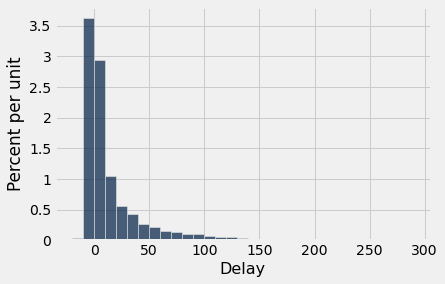

In [3]:
united.hist('Delay', bins=united_bins)

In [4]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [5]:
percentile(50, delays)

2

In [6]:
def one_sample_mean(sample_size):
    """ Takes a sample from the population of flights and computes its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [7]:
one_sample_mean(100)

15.45

In [9]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [10]:
sample_means_100 = ten_thousand_sample_means(100)

In [11]:
sample_means_100

array([14.66, 17.86, 13.77, ..., 14.3 , 18.98, 19.02])

In [12]:
len(sample_means_100)

10000

Population Average: 16.658155515370705


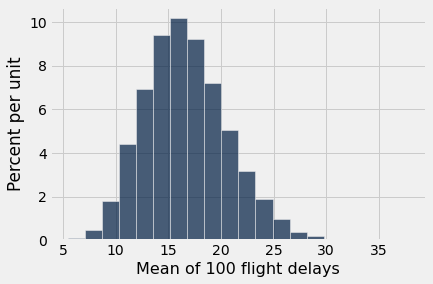

In [13]:
Table().with_column('Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)

Population Average: 16.658155515370705


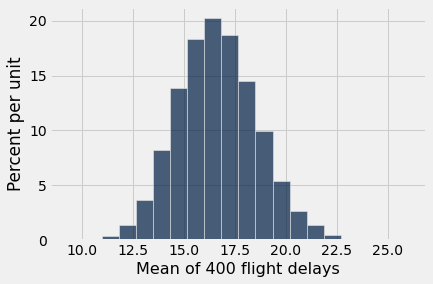

In [14]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', delay_mean)

In [15]:
sample_means_900 = ten_thousand_sample_means(900)

## Distribution of the Sample Average

### Why is There a Distribution?

* You have only one random sample, and it has only one average. 
* But the sample could have come out differently.
* And then the sample average might have been different.
* So there are many possible sample averages.


### Distribution of the Sample Average 

* Imagine all possible random samples of the same size as yours. There are lots of them.
* Each of these samples has an average.
* The distribution of the sample average is the distribution of the averages of all the possible samples.

### Demo: Distribution of the Sample Average

Explore the distribution of sample averages for a few different distributions.

In [15]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)

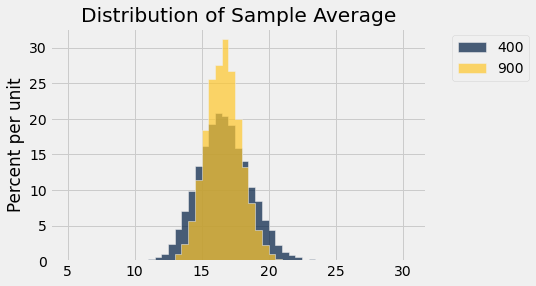

In [16]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

### Specifying the Distribution

* Suppose the random sample is large.
    * We have seen that the distribution of the sample average is roughly bell shaped.
* Important questions remain:
    * Where is the center of that bell curve?
    * How wide is that bell curve?

## Center of the Distribution

###  The Population Average

The distribution of the sample average is roughly a bell curve centered at the population average.

## Variability of the Sample Average

### Why Is This Important?

* Along with the center, the spread helps identify exactly which normal curve is the distribution of the sample average.
* The variability of the sample average helps us measure how accurate the sample average is as an estimate of the population average.
* If we want a specified level of accuracy, understanding the variability of the sample average helps us work out how large our sample has to be.

### Two Histogram

<img src="img/lec27_dist_sample_ave.png" width = 50%>

* The gold histogram shows the distribution of 10,000 values, each of which is an average of 900 randomly sampled flight delays.
* The blue histogram shows the distribution of 10,000 values, each of which is an average of 400 randomly sampled flight delays.
* Both are roughly bell shaped.
* The larger the sample size, the narrower the bell.

### Demo: The Influence of Sample Size

Notice how the sample size impacts the distribution of sample averages.

In [17]:
united = Table.read_table('united_summer2015.csv')

In [18]:
united.num_rows

13825

In [19]:
# How many possible sample means are there?
united.num_rows ** 400

1845253300060122534684058597421182951017338738756884128476156537109395559702295050837795610986469015706417701209704203890696502616877632733167737247128710898267622177602279004150237321497531712957437744194467949953310673085563343687922543234838511385550568262088418334016217887061735745358842456577208939555740404373614633941136938352510678553686140728842897559436843191863609514780562396147921834537075860636817493656816017587537752125750151805566479543166742758254440594398100342650860455445795087942680221047750947255562969782801791748639952850756659518870235020316513575934561122027710440608023538776721761349403194150575014182981349346980577699633375066811153948871815566280319121565243984196831524157664160526536071758298269096548661601001356951548310460921171197940711389849058290284443729287317331793254191518876765178731748453564076631795997590039640387156475975294002056115371653663653810384491550154761367793765502453546587829476276348569091617961438914859251316410793595152416543512156519

In [20]:
delay_mean = np.mean(united.column('Delay'))
delay_sd = np.std(united.column('Delay'))

In [21]:
"""Empirical distribution of random sample means"""

def plot_and_summarize_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.635382999999997
Population SD: 39.480199851609314
SD of sample means: 3.952114959526228


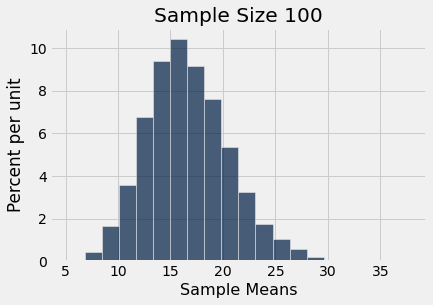

In [22]:
plot_and_summarize_sample_means(100)

In [23]:
39.48 / 3.932

10.040691759918616

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.649052500000003
Population SD: 39.480199851609314
SD of sample means: 1.9630690317698332


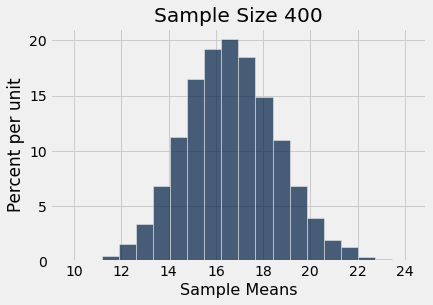

In [24]:
plot_and_summarize_sample_means(400)

In [25]:
39.48 / 1.973

20.010136847440442

Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.64966384
Population SD: 39.480199851609314
SD of sample means: 1.5742904122087686


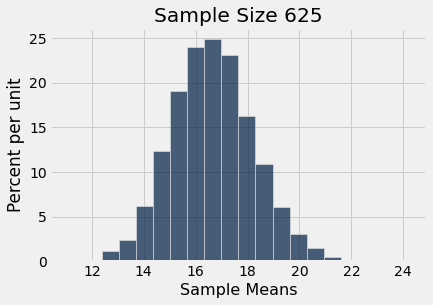

In [26]:
plot_and_summarize_sample_means(625)

In [27]:
39.48 / 1.577

25.034876347495242

### Variability of the Sample Average

* The distribution of all possible sample averages of a given size is called the distribution of the sample average.
* We approximate it by an empirical distribution.
* By the CLT, it's roughly normal:
    * Center =  the population average
    * SD = (population SD) / the square root of the sample size


### Reflection

A city has 500,000 households. The annual incomes of these households have an average of \\$65,000 and an SD of \\$45,000. The distribution of the incomes (pick one and explain):
1. is roughly normal because the number of households is large.
2. is not close to normal.
2. may be close to normal, or not; we can't tell from the information given.

Answer: #2, it must be skewed right. Given the large SD, and the fact that nobody has a negative income, but some people have very large incomes, far above $65,000

<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>